# Chart and Plot representation

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Visualization of the gender gap in Biology degrees

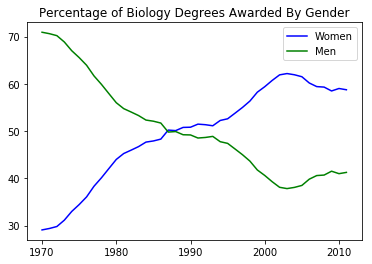

In [2]:
#data men = 100 - data women (%)
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')
plt.show()

## Making chart more simple: hiding tick marks, spines and modifying axes limits

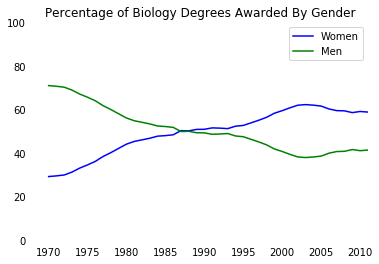

In [3]:
fig, ax = plt.subplots()

ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom=False, top=False, left=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlim(1968,2011)
ax.set_ylim(0,100)
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc='upper right')
plt.show()

## Comparing Gender Gap Across Degree Categories, using FOR LOOP

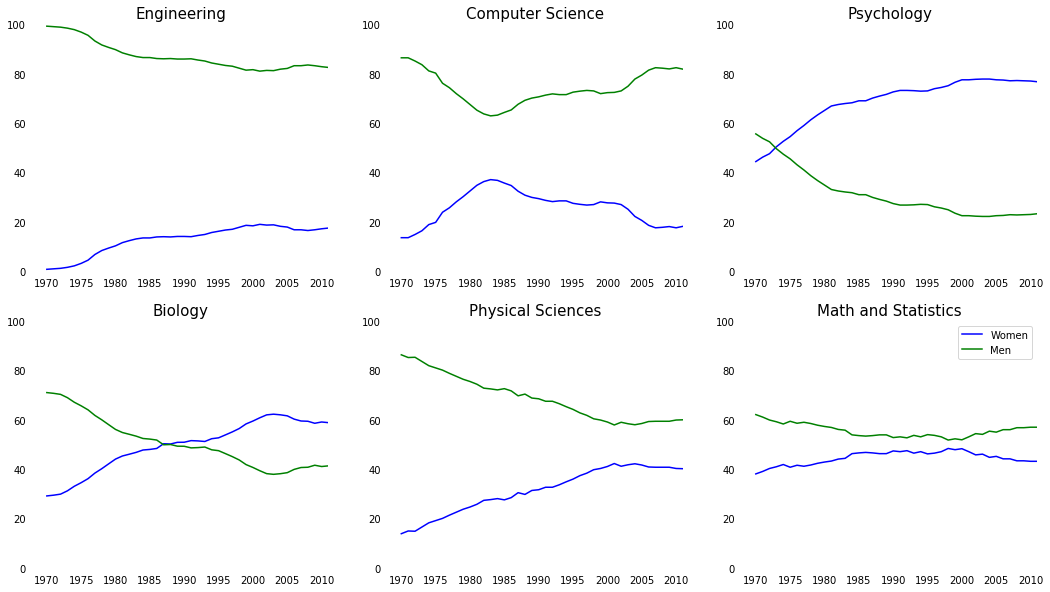

In [4]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18,10))

for sp in range(0,6):
    ax = fig.add_subplot(2,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c='green', label='Men')
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_title(stem_cats[sp], fontsize=15)

plt.legend(loc='upper right')
plt.show()

## Color, Layout and Annotations

The [Color Blind 10](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (.)

**Color**: c=(0/255, 107/255, 164/255) : dark blue; c=(255/255, 128/255, 14/255) : orange.

**Layout**: linewidth = 3

**Annotations**: axes.text(x,y,"label")

Let's compare gender gap across 6 degrees of STEM group.


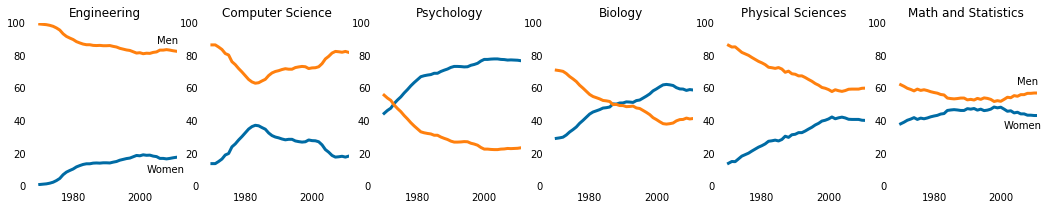

In [5]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize=(18,3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    if sp == 0:
        ax.text(2005,87,'Men')
        ax.text(2002,8,'Women')
    elif sp == 5:
        ax.text(2005,62,'Men')
        ax.text(2001,35,'Women')
plt.show()

## Avanced case

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

In [6]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

While in the last mission, the `stem_cats` list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. We may have also noticed that while `stem_cats` and `other_cats` have **six** degree categories as elements, `lib_arts_cats` only has **five**. 

We'll need to not only modify the for loop to generate the STEM line charts that we wrote in the last mission but also add two new for loops to generate the line charts for liberal arts degrees and for other degrees.

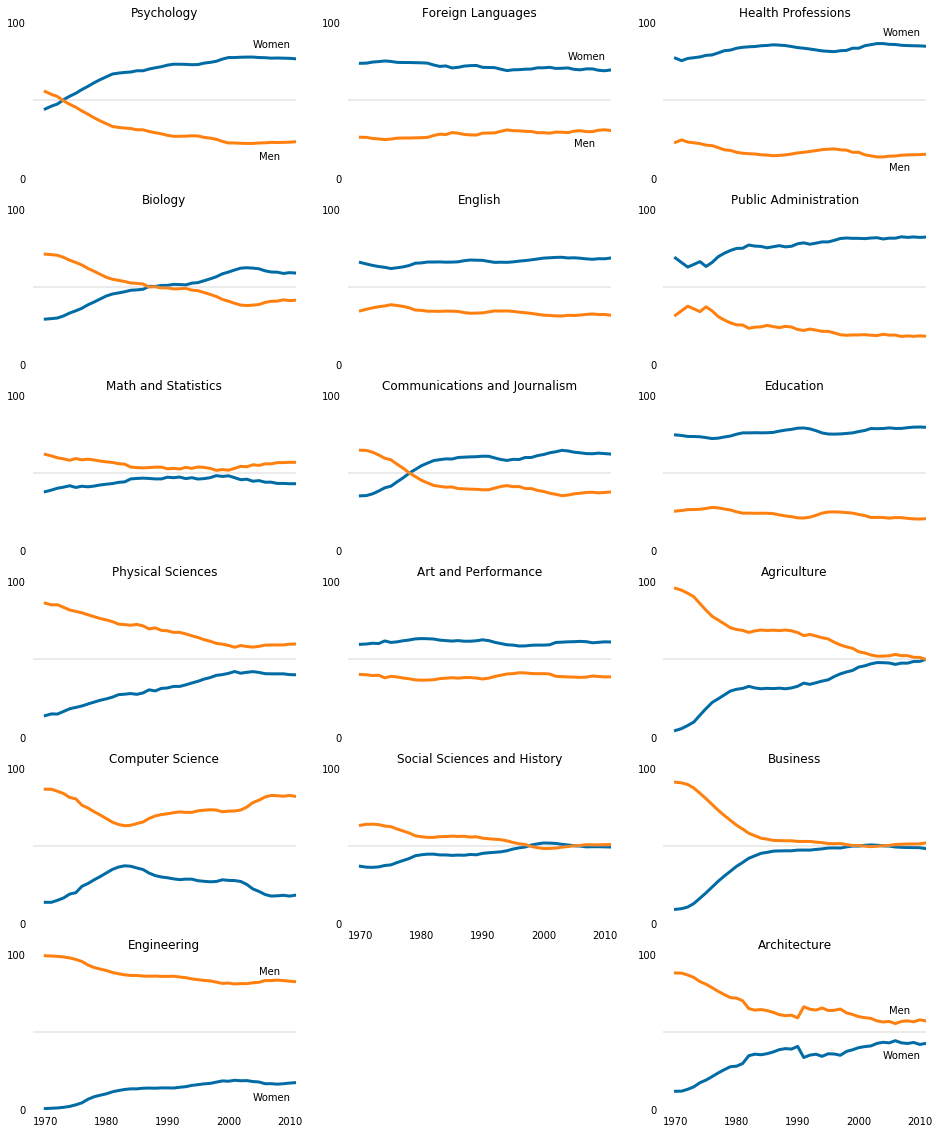

In [7]:
fig = plt.figure(figsize=(16,20))

## Generate first column of line charts: STEM degrees
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])                                          # Make visible the 0 and 100 only in the y-axis.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)        # Insert a horizontal symetric line.
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title(stem_cats[cat_index])
    if cat_index == 0:
        ax.text(2004,84,'Women')
        ax.text(2005,12,'Men')
    elif cat_index == 5:
        ax.text(2004,6,'Women')
        ax.text(2005,87,'Men')
        ax.tick_params(labelbottom=True)      #Enable the x-axis label in the bottommost chart only, disable the rest.

## Generate second column of line charts: Liberal and Art degrees
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title(lib_arts_cats[cat_index])
    if cat_index == 0:
        ax.text(2004,76,'Women')
        ax.text(2005,20,'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)

## Generate third column f line charts: Other degrees
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title(other_cats[cat_index])
    if cat_index == 0:
        ax.text(2004,92,'Women')
        ax.text(2005,5,'Men') 
    elif cat_index == 5:
        ax.text(2004,33,'Women')
        ax.text(2005,62,'Men')
        ax.tick_params(labelbottom=True)

plt.show()

## Exporting to a file

Exporting plots we create using matplotlib allow us to use them in Word documents, PowerPoint presentations, and even in emails.

Use : `fig.savefig()` to export all of the plots contained in the figure as a single image file.

**NOTE !!!** `fig.savefig()` have to be called before we display the figure using `pyplot.show()`

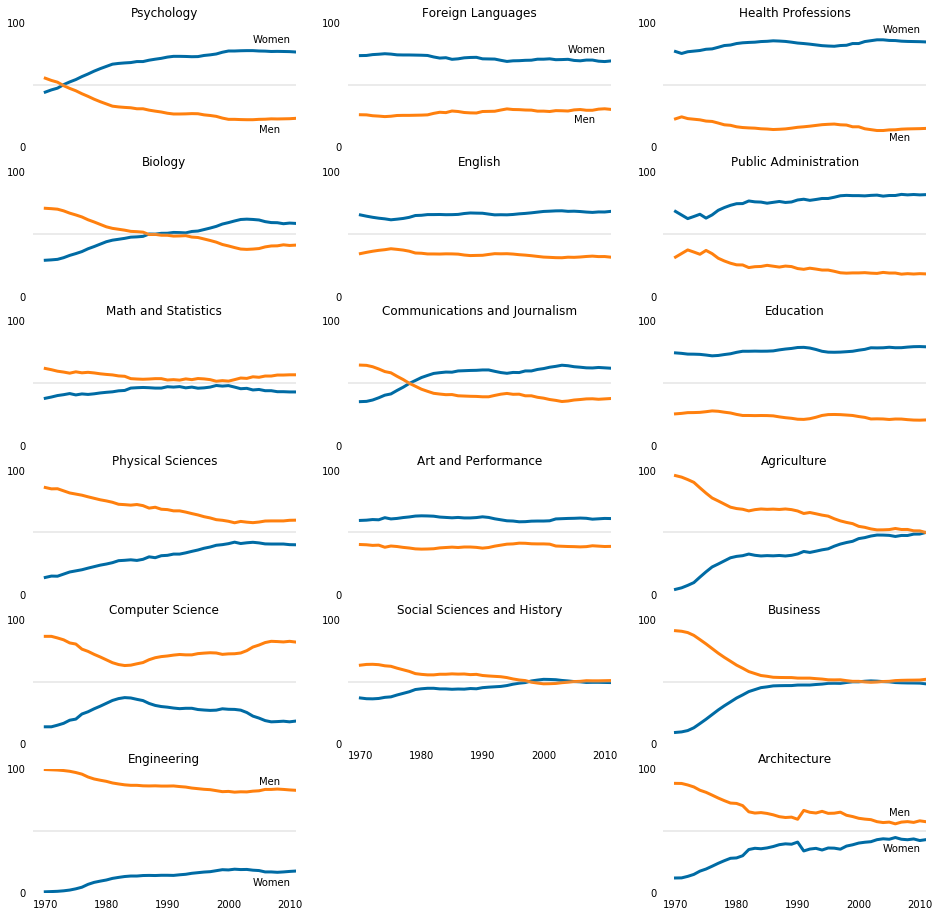

In [9]:
## Set backend to Agg.
fig = plt.figure(figsize=(16,16))

## Copy the plots above
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])                                          # Make visible the 0 and 100 only in the y-axis.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)        # Insert a horizontal symetric line.
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title(stem_cats[cat_index])
    if cat_index == 0:
        ax.text(2004,84,'Women')
        ax.text(2005,12,'Men')
    elif cat_index == 5:
        ax.text(2004,6,'Women')
        ax.text(2005,87,'Men')
        ax.tick_params(labelbottom=True)      #Enable the x-axis label in the bottommost chart only, disable the rest.

for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title(lib_arts_cats[cat_index])
    if cat_index == 0:
        ax.text(2004,76,'Women')
        ax.text(2005,20,'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)

for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, linewidth=3, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title(other_cats[cat_index])
    if cat_index == 0:
        ax.text(2004,92,'Women')
        ax.text(2005,5,'Men') 
    elif cat_index == 5:
        ax.text(2004,33,'Women')
        ax.text(2005,62,'Men')
        ax.tick_params(labelbottom=True)
        
## Export file before calling pyplot.show()
fig.savefig('gender_degrees.png')
plt.show()